In [1]:
import os
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_parquet("../processed_data/combined.parquet")

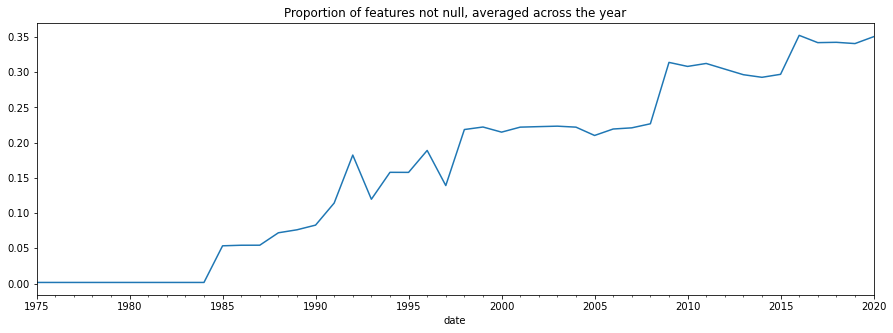

In [3]:
(df.notnull().sum(axis="columns")/df.shape[1]).resample("Y").mean().plot(figsize=(15, 5))
plt.title("Proportion of features not null, averaged across the year");

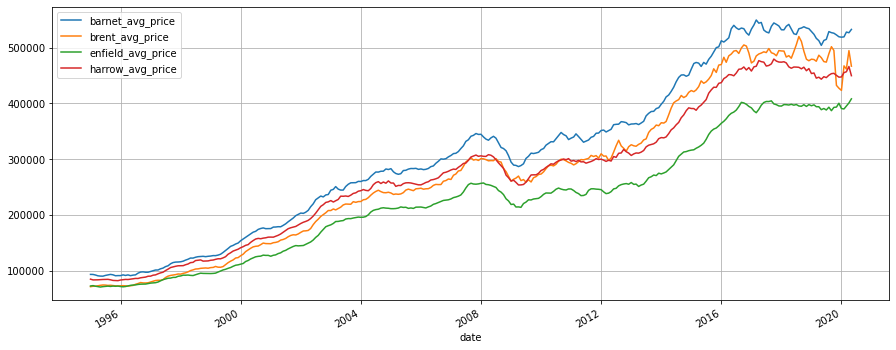

In [4]:
df[['barnet_avg_price', 'brent_avg_price', 'enfield_avg_price', 'harrow_avg_price']].drop_duplicates().plot(figsize=(15, 6))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.grid()

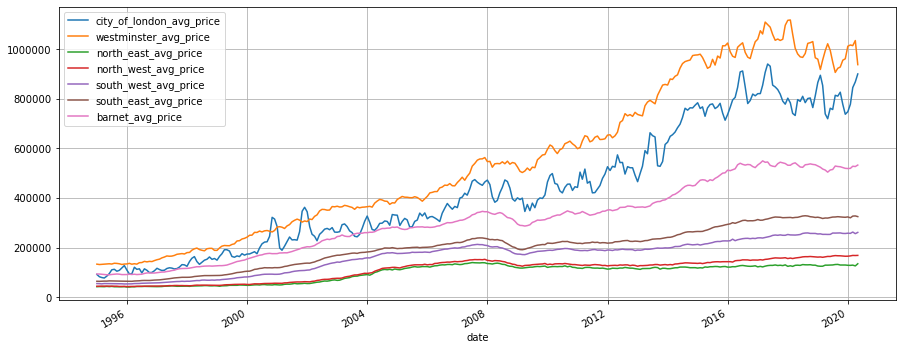

In [5]:
df[[
    'city_of_london_avg_price',
    'westminster_avg_price',
    'north_east_avg_price',
    'north_west_avg_price',
    'south_west_avg_price',
    'south_east_avg_price',
    'barnet_avg_price'
]].drop_duplicates().plot(figsize=(15, 6))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.grid()

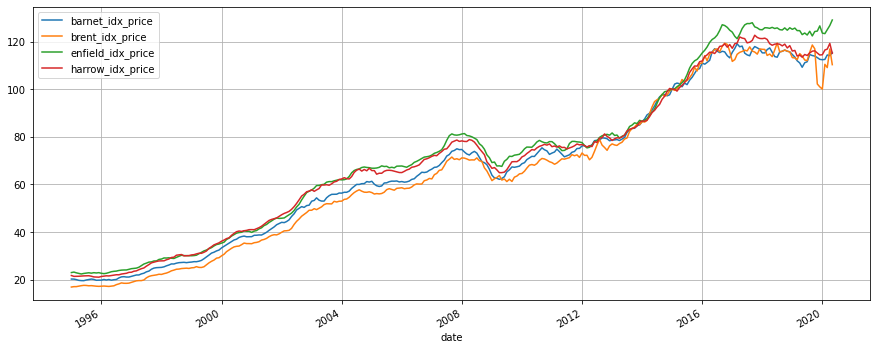

In [6]:
df[[
    'barnet_idx_price',
    'brent_idx_price',
    'enfield_idx_price',
    'harrow_idx_price'
]].drop_duplicates().plot(figsize=(15, 6))
plt.grid()

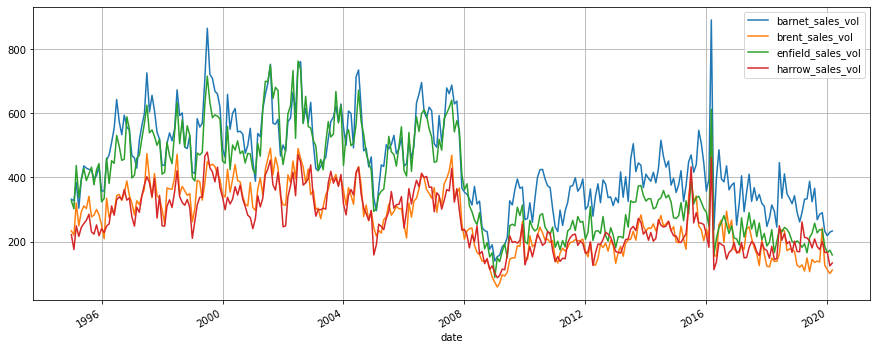

In [7]:
df[['barnet_sales_vol', 'brent_sales_vol', 'enfield_sales_vol', 'harrow_sales_vol']].drop_duplicates().plot(figsize=(15, 6))
plt.grid()

In [8]:
corr = df[[col for col in df.columns if 'avg_price' in col]].corr()
mask = np.triu(np.ones(corr.shape)).astype(bool)
corr = pd.DataFrame(corr.where(mask).unstack()).to_records()
corr = pd.DataFrame(corr).reset_index(drop=True).rename(columns={"level_0": "region1", "level_1": "region2", "0": "corr"})
corr = corr.sort_values(by="corr").query("region1 != region2").reset_index(drop=True).dropna(subset=["corr"])
corr

region1                           region2  \
0              north_east_avg_price          city_of_london_avg_price   
1              north_east_avg_price             westminster_avg_price   
2              north_east_avg_price  kensington_and_chelsea_avg_price   
3              north_east_avg_price                  camden_avg_price   
4              north_east_avg_price                 hackney_avg_price   
..                              ...                               ...   
985          outer_london_avg_price              hillingdon_avg_price   
986          outer_london_avg_price                  sutton_avg_price   
987                london_avg_price                  ealing_avg_price   
988  yorks_and_the_humber_avg_price              north_west_avg_price   
989          outer_london_avg_price                 bromley_avg_price   

         corr  
0    0.674273  
1    0.698575  
2    0.713057  
3    0.725470  
4    0.726070  
..        ...  
985  0.998872  
986  0.998883  
987  0.998923  
988  0.999370  
989  0.999527  

[990 rows x 3 columns]

In [9]:
corr.head(20)

region1                           region2      corr
0   north_east_avg_price          city_of_london_avg_price  0.674273
1   north_east_avg_price             westminster_avg_price  0.698575
2   north_east_avg_price  kensington_and_chelsea_avg_price  0.713057
3   north_east_avg_price                  camden_avg_price  0.725470
4   north_east_avg_price                 hackney_avg_price  0.726070
5   north_east_avg_price               southwark_avg_price  0.728536
6   north_east_avg_price          waltham_forest_avg_price  0.728659
7   north_east_avg_price                 lambeth_avg_price  0.730774
8   north_east_avg_price               islington_avg_price  0.734393
9   north_east_avg_price                haringey_avg_price  0.738725
10  north_east_avg_price            inner_london_avg_price  0.741843
11  north_east_avg_price                  merton_avg_price  0.743330
12  north_east_avg_price                lewisham_avg_price  0.746099
13  north_east_avg_price    richmond_upon_thames_avg_price  0.750963
14  north_east_avg_price  hammersmith_and_fulham_avg_price  0.752521
15  north_east_avg_price              wandsworth_avg_price  0.758169
16  north_east_avg_price                  ealing_avg_price  0.761122
17  north_east_avg_price    kingston_upon_thames_avg_price  0.762165
18      london_avg_price              north_east_avg_price  0.762264
19  north_east_avg_price                   brent_avg_price  0.762696

In [10]:
corr.tail(20)

region1                    region2      corr
970            hillingdon_avg_price          bromley_avg_price  0.998227
971                london_avg_price           merton_avg_price  0.998241
972                harrow_avg_price          enfield_avg_price  0.998263
973          inner_london_avg_price        southwark_avg_price  0.998356
974            hillingdon_avg_price           harrow_avg_price  0.998357
975                sutton_avg_price       hillingdon_avg_price  0.998417
976                harrow_avg_price          bromley_avg_price  0.998431
977                sutton_avg_price          enfield_avg_price  0.998468
978                sutton_avg_price          bromley_avg_price  0.998515
979          inner_london_avg_price          lambeth_avg_price  0.998665
980          outer_london_avg_price           harrow_avg_price  0.998670
981            south_east_avg_price  east_of_england_avg_price  0.998706
982          outer_london_avg_price        greenwich_avg_price  0.998750
983            hillingdon_avg_price          enfield_avg_price  0.998833
984          outer_london_avg_price          enfield_avg_price  0.998855
985          outer_london_avg_price       hillingdon_avg_price  0.998872
986          outer_london_avg_price           sutton_avg_price  0.998883
987                london_avg_price           ealing_avg_price  0.998923
988  yorks_and_the_humber_avg_price       north_west_avg_price  0.999370
989          outer_london_avg_price          bromley_avg_price  0.999527

In [11]:
corr = df.reset_index()[[col for col in df.columns if 'avg_price' in col]].drop_duplicates().corr()
mask = np.triu(np.ones(corr.shape)).astype(bool)
corr = pd.DataFrame(corr.where(mask).unstack()).to_records()
corr = pd.DataFrame(corr).reset_index(drop=True).rename(columns={"level_0": "region1", "level_1": "region2", "0": "corr"})
corr = corr.sort_values(by="corr").query("region1 != region2").reset_index(drop=True).dropna(subset=["corr"])

Text(0.5, 1.0, 'Bank of England Rate')

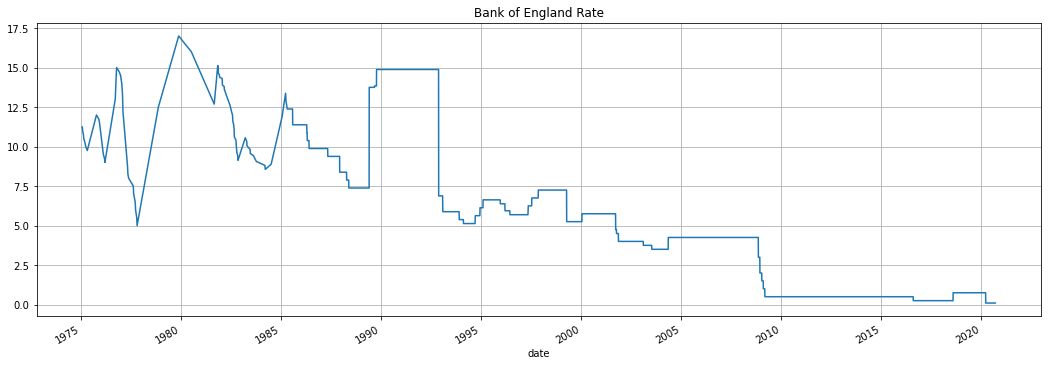

In [12]:
df['rate'].ffill().plot(figsize=(18, 6))
plt.grid()
plt.title("Bank of England Rate")

In [13]:
def plot(df, bbox_to_anchor, colormap):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    df.plot(colormap=colormap, ax=ax)
    ax.grid()
    ax.legend(bbox_to_anchor=bbox_to_anchor)
    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)

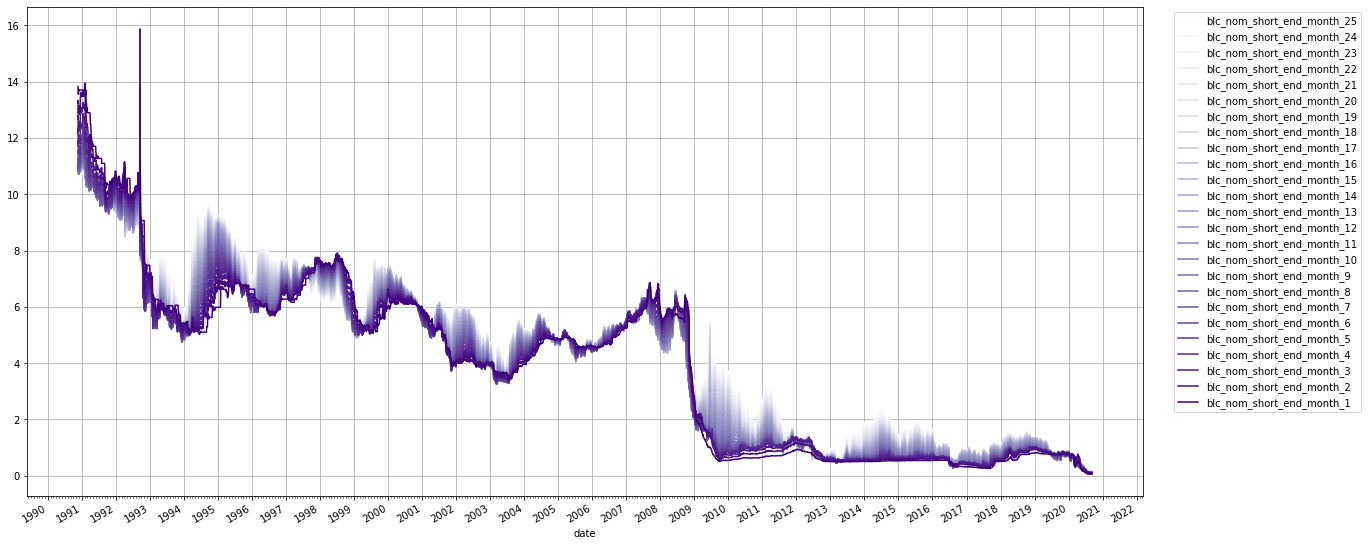

In [14]:
plot(df[[col for col in df.columns if 'nom_short_end_month' in col][:25][::-1]].ffill(), (1.2, 1), 'Purples')

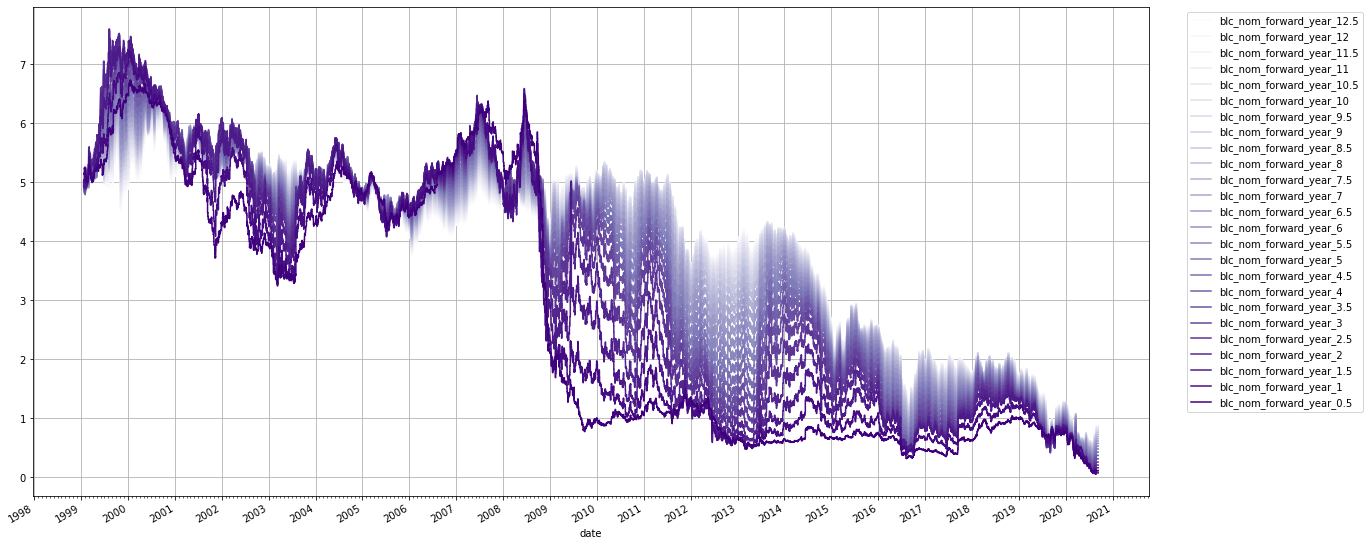

In [15]:
plot(df[[col for col in df.columns if 'nom_forward_year' in col][:25][::-1]].ffill(), (1.03, 1), 'Purples')

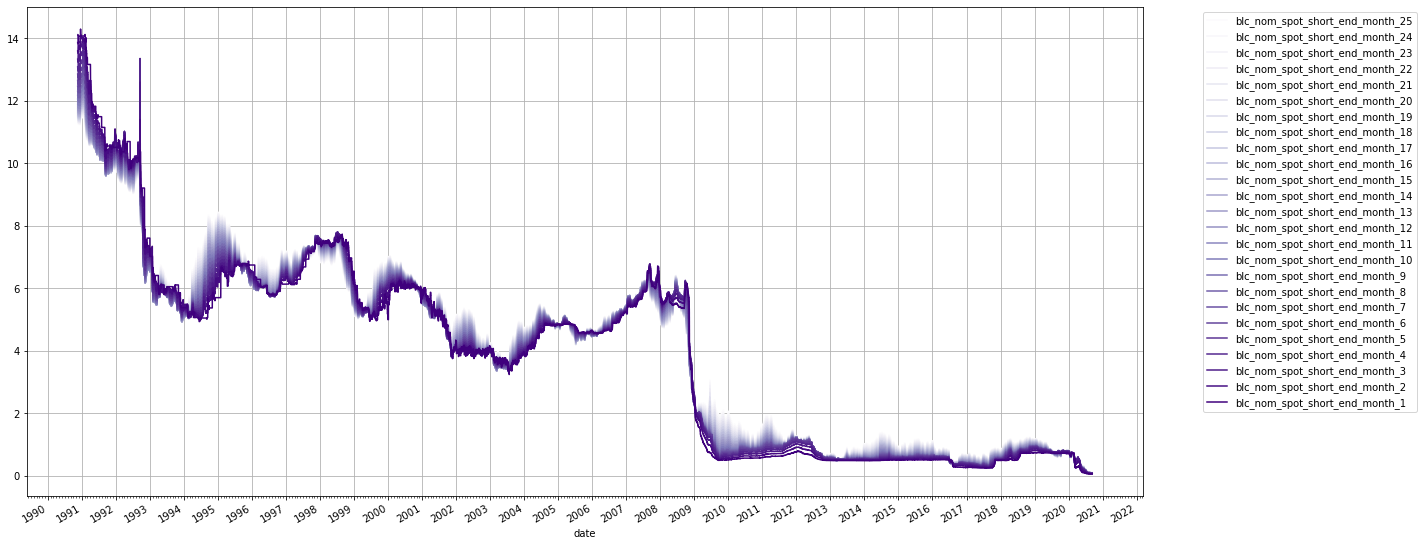

In [17]:
plot(df[[col for col in df.columns if 'nom_spot_short_end_month' in col][:25][::-1]].ffill(), (1.25, 1), 'Purples')

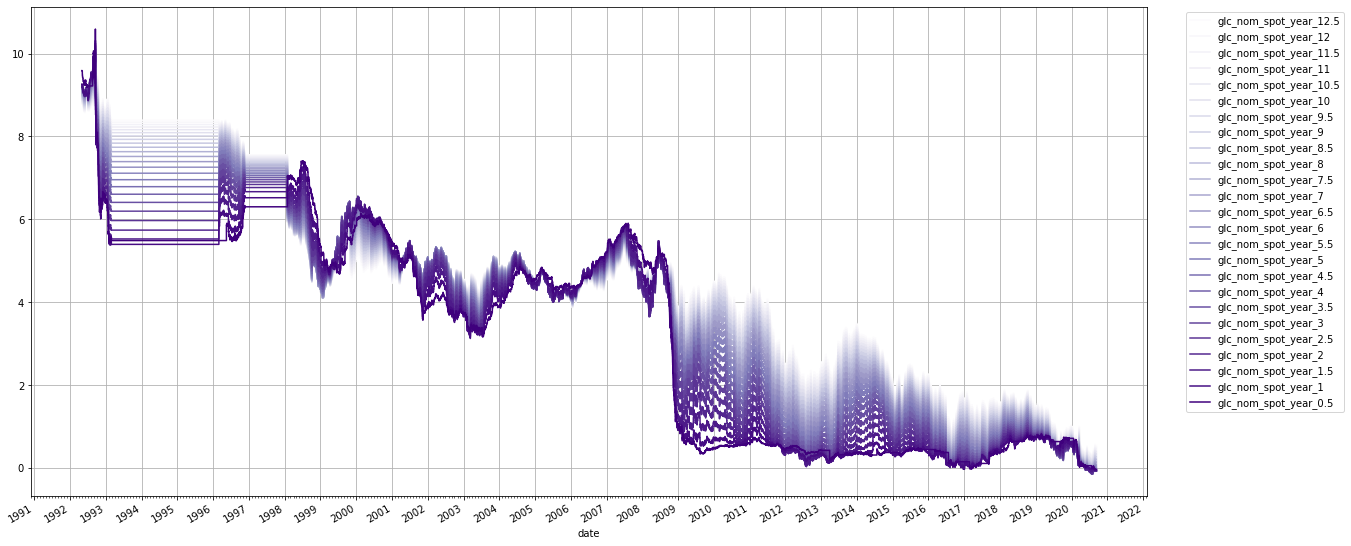

In [18]:
plot(df[[col for col in df.columns if 'nom_spot_year' in col][:25][::-1]].ffill(), (1.03, 1), 'Purples')

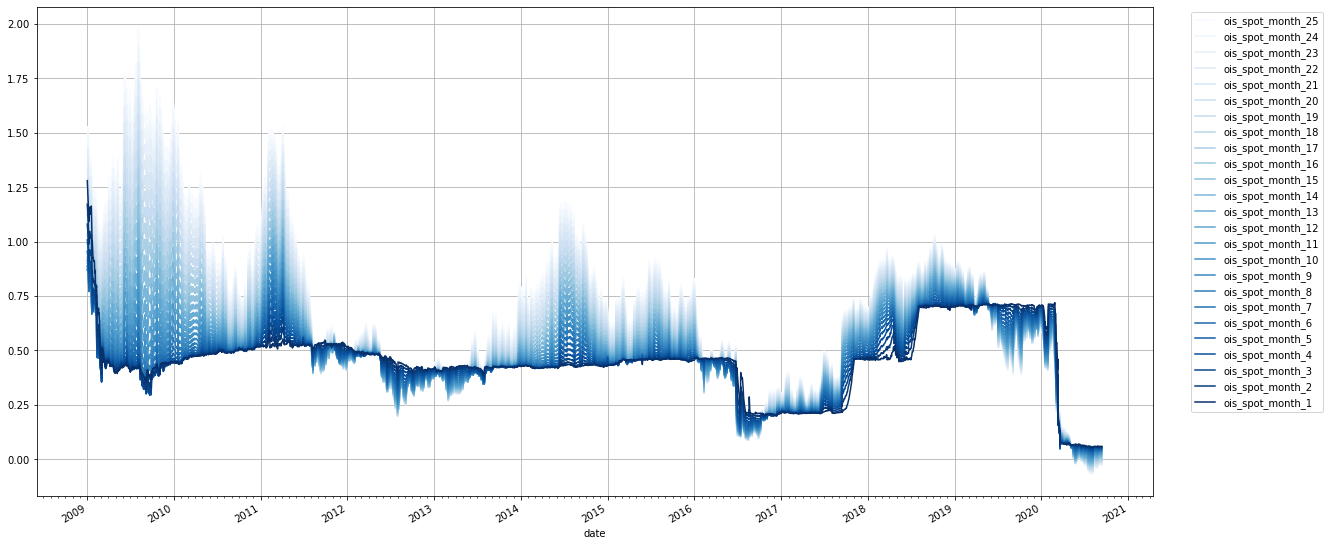

In [19]:
plot(df[[col for col in df.columns if 'ois_spot_month' in col][:25][::-1]].ffill(), (1.03, 1), 'Blues')

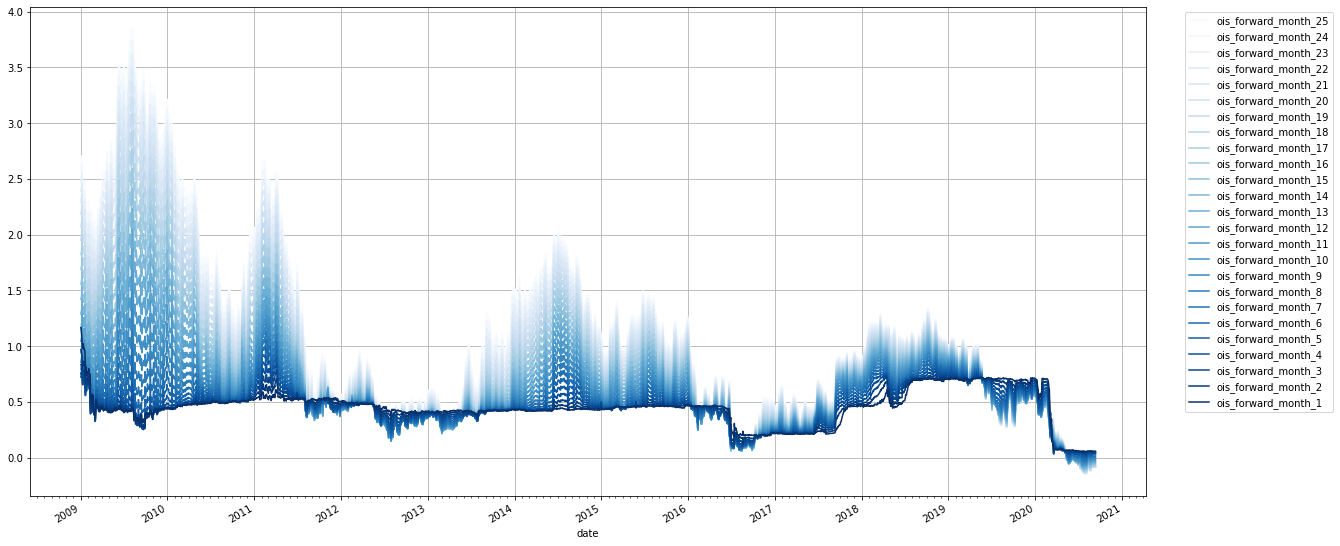

In [20]:
plot(df[[col for col in df.columns if 'ois_forward_month' in col][:25][::-1]].ffill(), (1.03, 1), 'Blues')

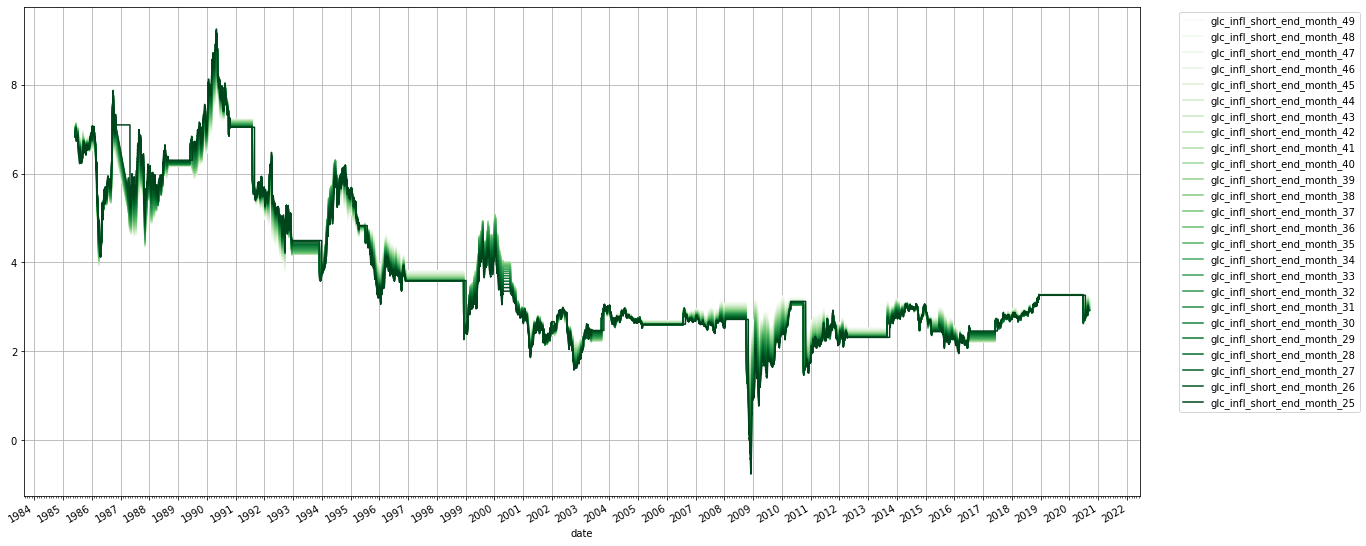

In [21]:
plot(df[[col for col in df.columns if 'infl_short_end_month' in col][:25][::-1]].ffill(), (1.03, 1), 'Greens')

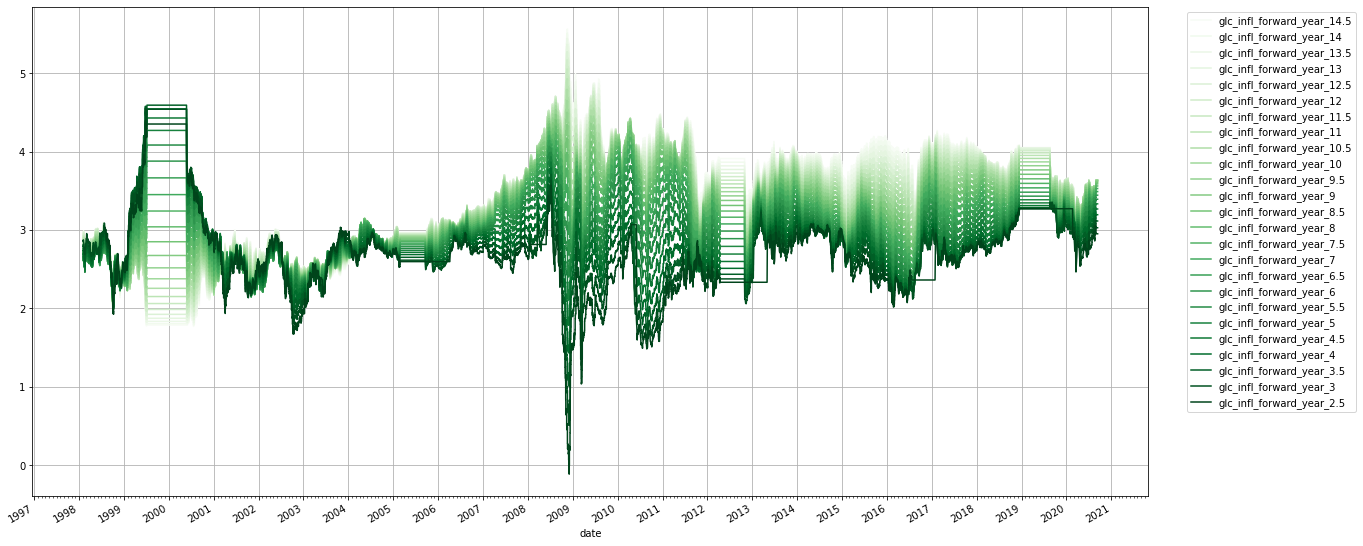

In [22]:
plot(df[[col for col in df.columns if 'infl_forward_year' in col][:25][::-1]].ffill(), (1.03, 1), 'Greens')

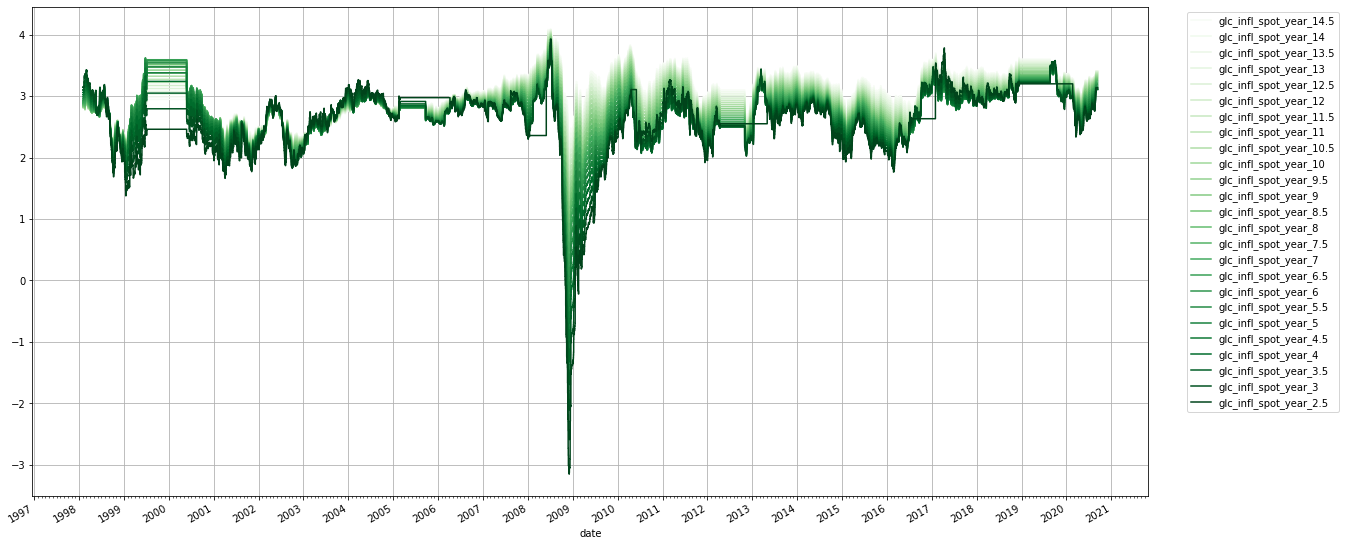

In [23]:
plot(df[[col for col in df.columns if 'infl_spot_year' in col][:25][::-1]].ffill(), (1.03, 1), 'Greens')

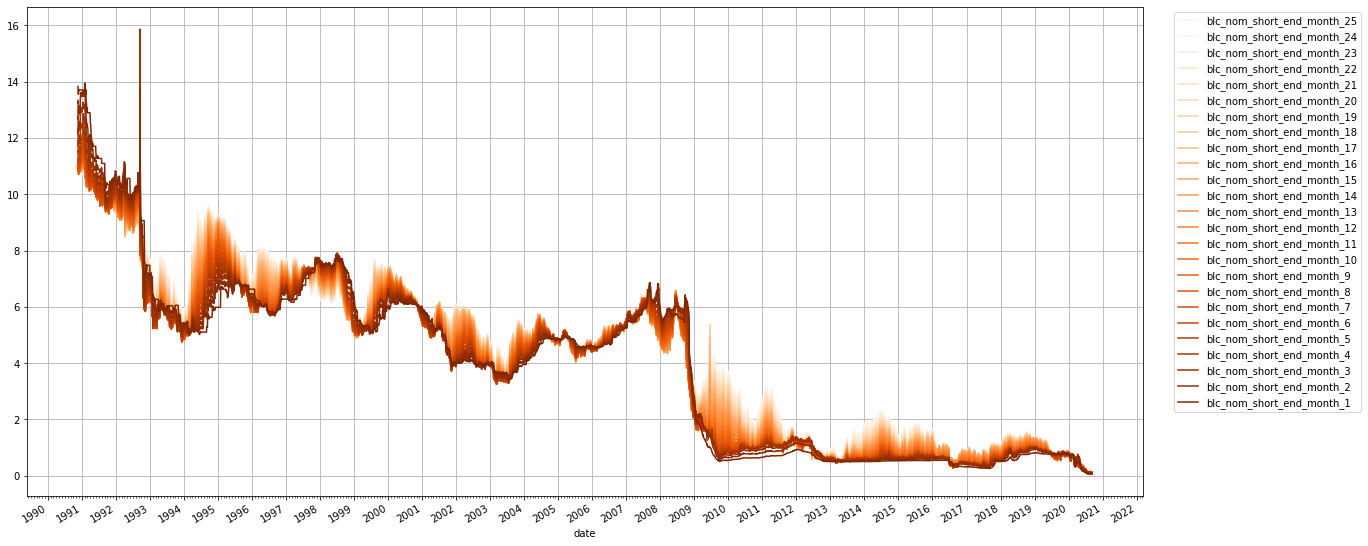

In [24]:
plot(df[[col for col in df.columns if 'blc_nom_short_end_month' in col][:25][::-1]].ffill(), (1.2, 1), 'Oranges')

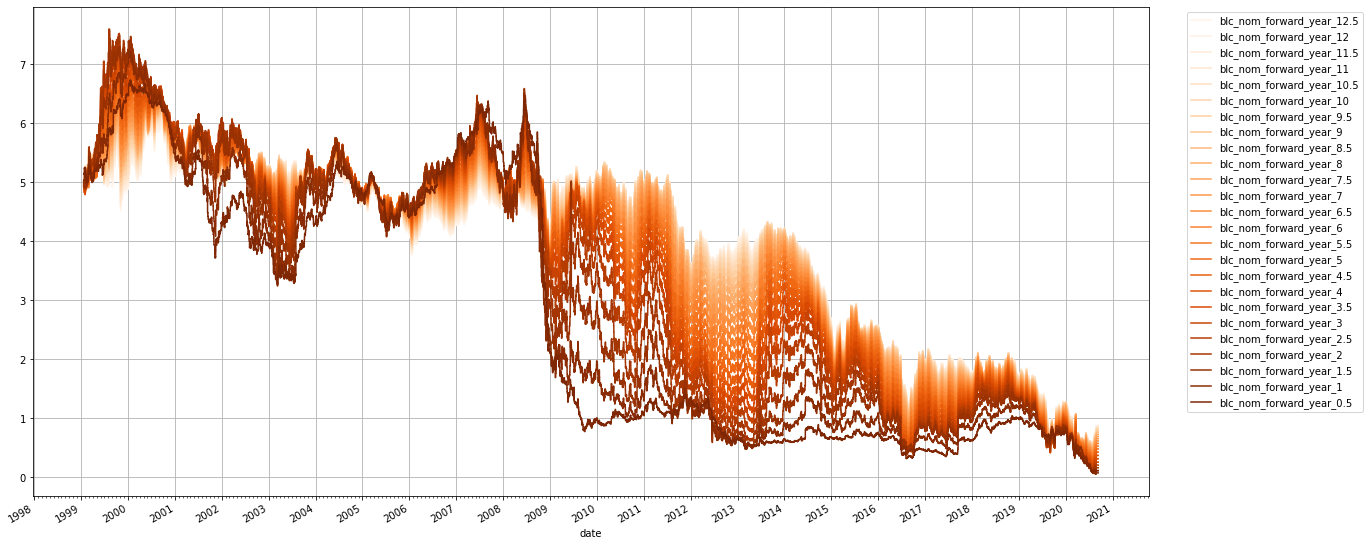

In [25]:
plot(df[[col for col in df.columns if 'blc_nom_forward_year' in col][:25][::-1]].ffill(), (1.03, 1), 'Oranges')

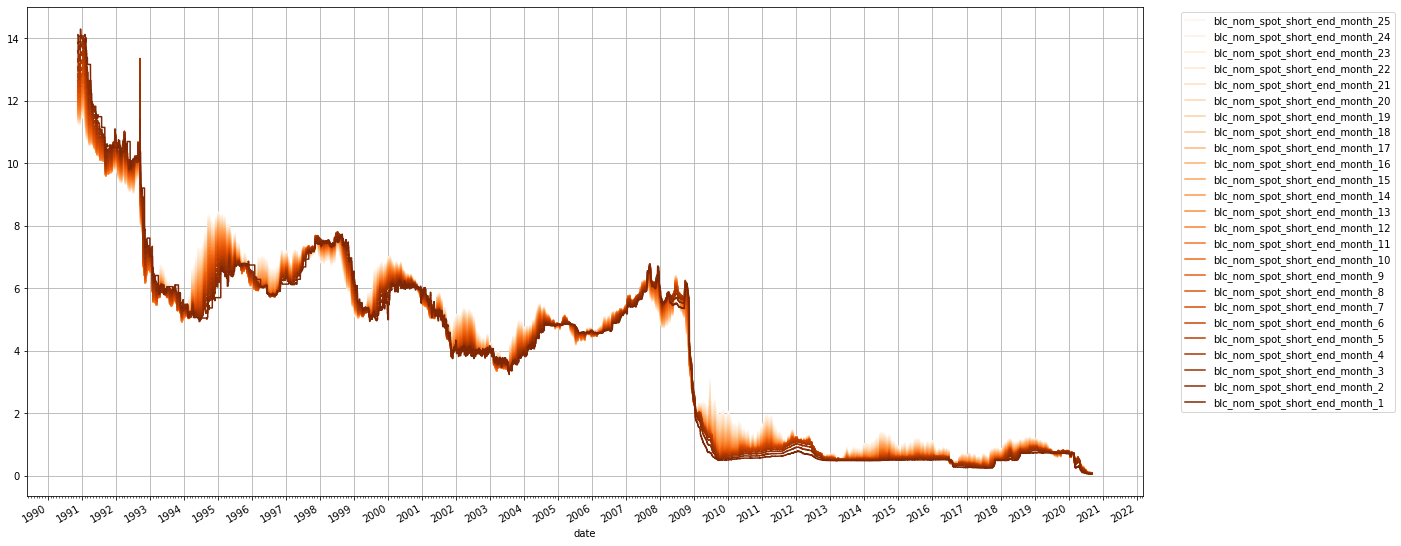

In [26]:
plot(df[[col for col in df.columns if 'blc_nom_spot_short_end_month' in col][:25][::-1]].ffill(), (1.23, 1), 'Oranges')

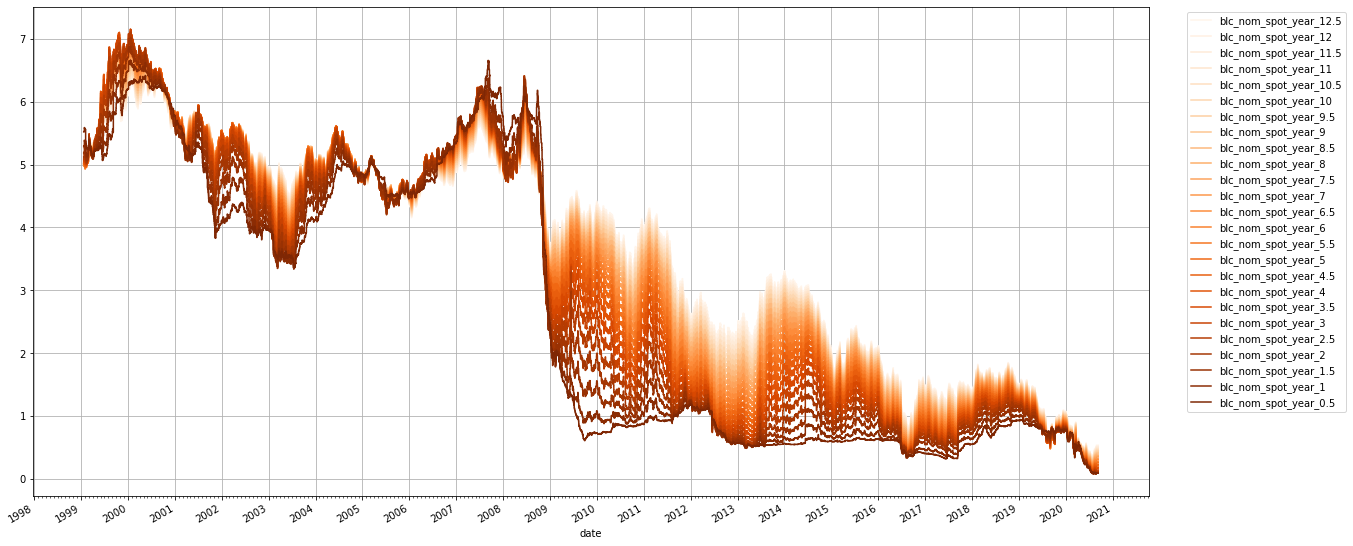

In [27]:
plot(df[[col for col in df.columns if 'blc_nom_spot_year' in col][:25][::-1]].ffill(), (1.03, 1), 'Oranges')

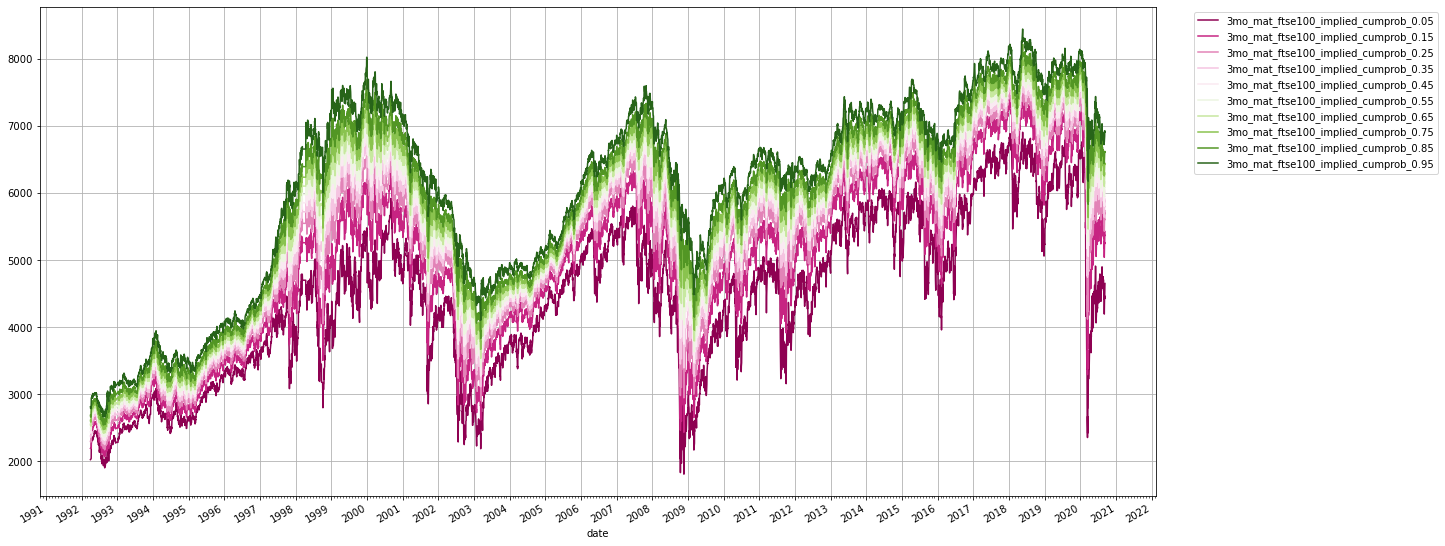

In [28]:
plot(df[[col for col in df.columns if '3mo_mat_ftse100_implied_cumprob' in col]].ffill(), (1.03, 1), 'PiYG')

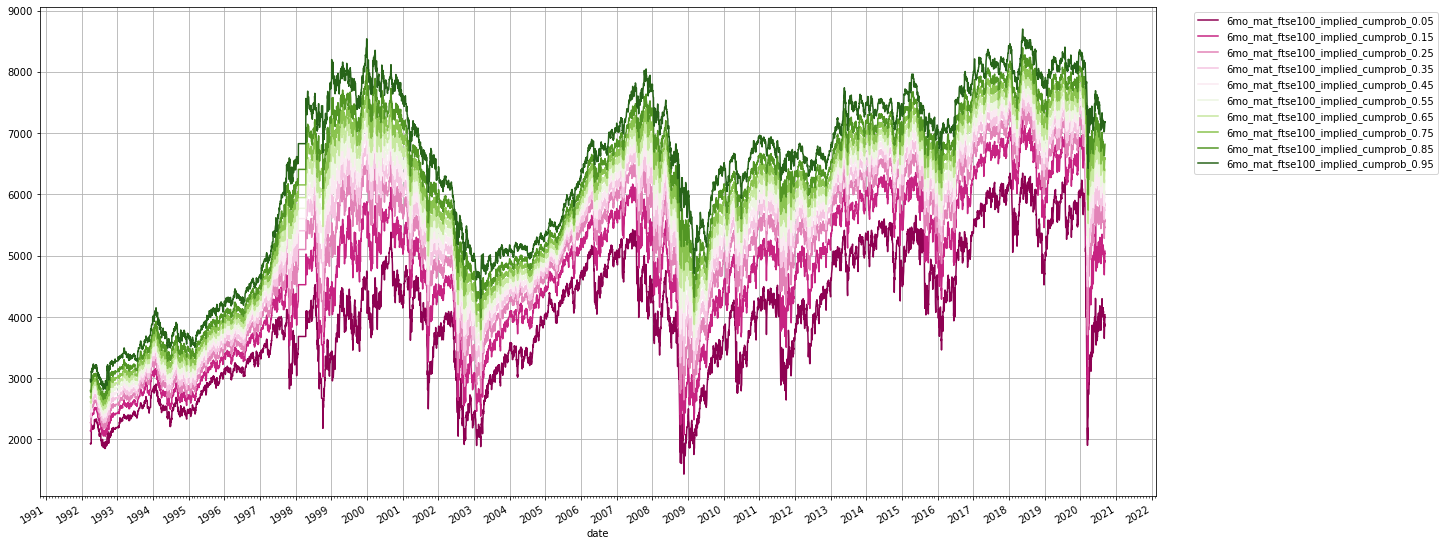

In [29]:
plot(df[[col for col in df.columns if '6mo_mat_ftse100_implied_cumprob' in col]].ffill(), (1.03, 1), 'PiYG')

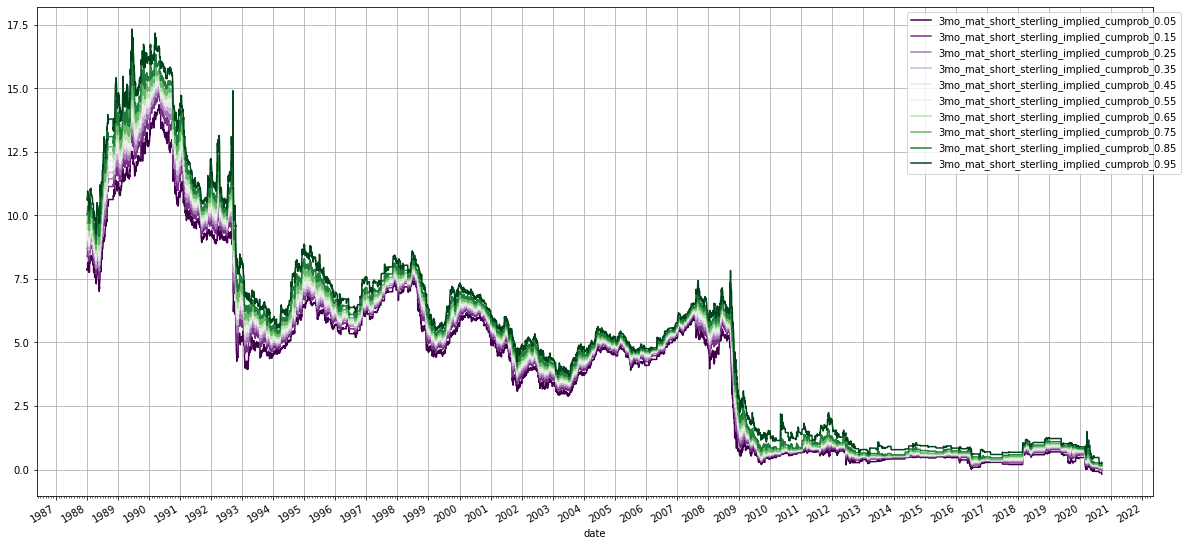

In [30]:
plot(df[[col for col in df.columns if '3mo_mat_short_sterling_implied_cumprob' in col]].ffill(), (1.03, 1), 'PRGn')

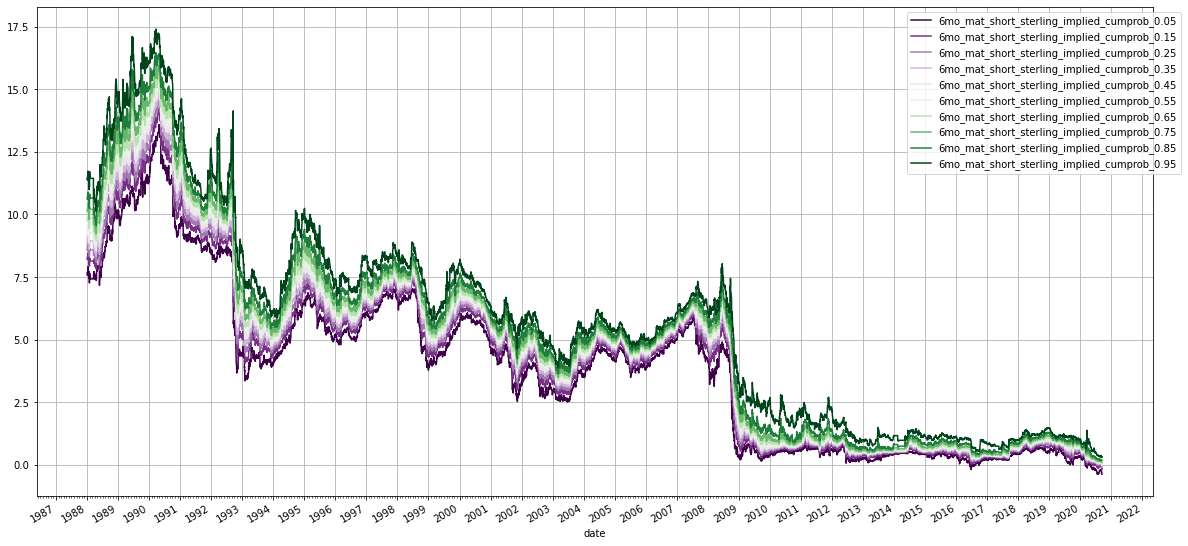

In [31]:
plot(df[[col for col in df.columns if '6mo_mat_short_sterling_implied_cumprob' in col]].ffill(), (1.03, 1), 'PRGn')

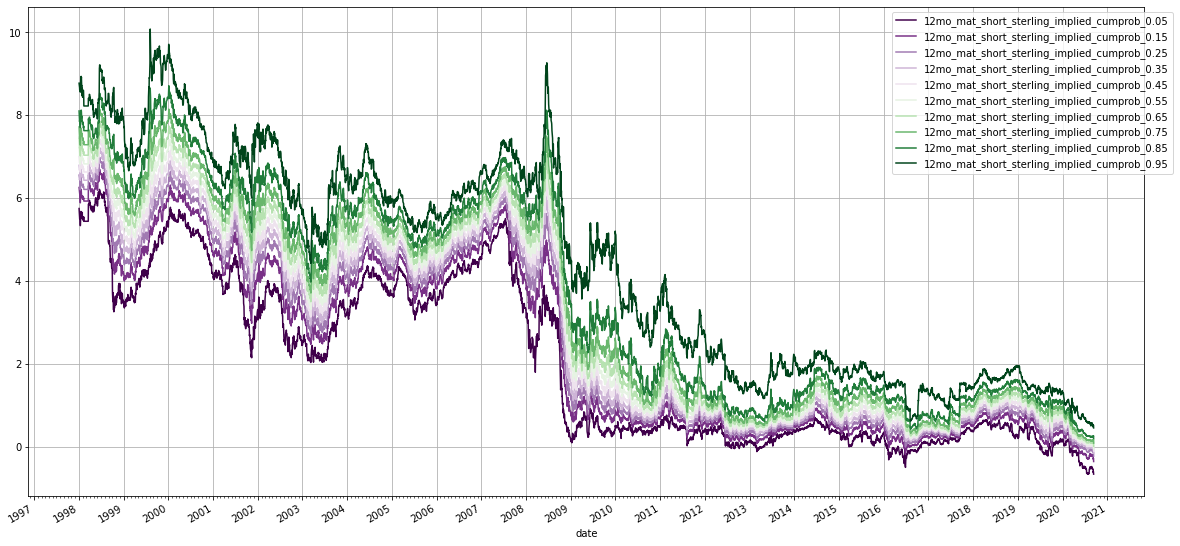

In [32]:
plot(df[[col for col in df.columns if '12mo_mat_short_sterling_implied_cumprob' in col]].ffill(), (1.03, 1), 'PRGn')

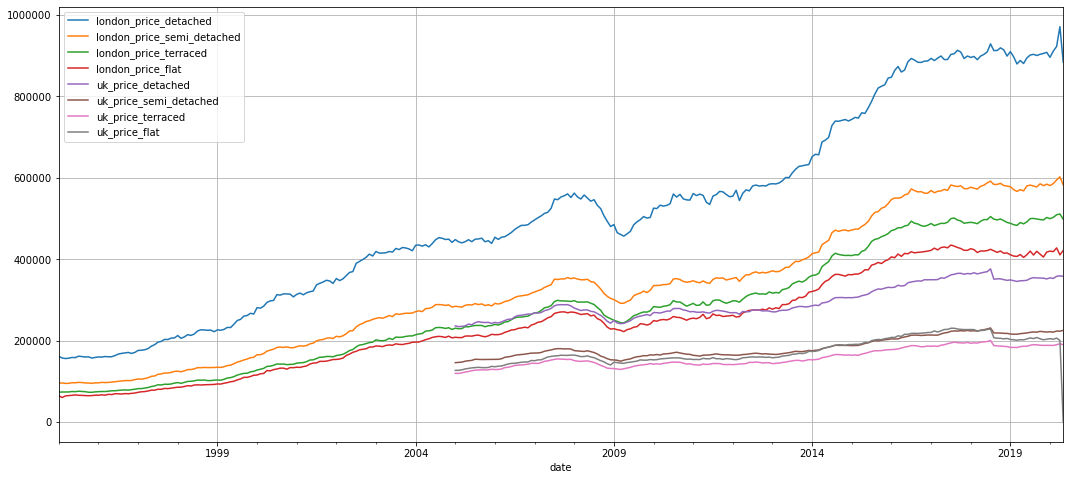

In [33]:
df[
    ['london_price_detached',
     'london_price_semi_detached',
     'london_price_terraced',
     'london_price_flat',
     'uk_price_detached',
     'uk_price_semi_detached',
     'uk_price_terraced',
     'uk_price_flat']
].dropna(how="all").drop_duplicates().plot(figsize=(18, 8))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.grid()

In [34]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 849910 entries, 1975-01-20 to 2020-09-11
Data columns (total 1321 columns):
 #    Column                                           Non-Null Count   Dtype  
---   ------                                           --------------   -----  
 0    glc_nom_short_end_month_1                        167026 non-null  float64
 1    glc_nom_short_end_month_2                        167044 non-null  float64
 2    glc_nom_short_end_month_3                        167044 non-null  float64
 3    glc_nom_short_end_month_4                        167044 non-null  float64
 4    glc_nom_short_end_month_5                        167044 non-null  float64
 5    glc_nom_short_end_month_6                        167044 non-null  float64
 6    glc_nom_short_end_month_7                        167044 non-null  float64
 7    glc_nom_short_end_month_8                        167044 non-null  float64
 8    glc_nom_short_end_month_9                        167044 non-null 